In [2]:
## Data was retrieved from Kaggle at https://www.kaggle.com/datasets/mukuldeshantri/ecommerce-fashion-dataset
## This project used data ingestion, handling and visualization to provide a preliminary analysis

%matplotlib notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Data Ingestion
ecommerce = pd.read_csv('FashionDataset.csv')
ecommerce

,Unnamed: 0,BrandName,Deatils,Sizes,MRP,SellPrice,Discount,Category
0,0,life,solid cotton blend collar neck womens a-line d...,"Size:Large,Medium,Small,X-Large,X-Small",Rs\n1699,849,50% off,Westernwear-Women
1,1,only,polyester peter pan collar womens blouson dres...,"Size:34,36,38,40",Rs\n3499,2449,30% off,Westernwear-Women
2,2,fratini,solid polyester blend wide neck womens regular...,"Size:Large,X-Large,XX-Large",Rs\n1199,599,50% off,Westernwear-Women
3,3,zink london,stripes polyester sweetheart neck womens dress...,"Size:Large,Medium,Small,X-Large",Rs\n2299,1379,40% off,Westernwear-Women
4,4,life,regular fit regular length denim womens jeans ...,"Size:26,28,30,32,34,36",Rs\n1699,849,50% off,Westernwear-Women
...,...,...,...,...,...,...,...,...
30753,21,swarovski,crystal stylish womens rodhium earrings,Nan,Nan,8950,Nan,Jewellery-Women
30754,22,Nan,Nan,Nan,Nan,Nan,Nan,Jewellery-Women
30755,23,jewelz,ethnic gold plated jhumki earrings,Nan,Rs\n1839,643,65% off,Jewellery-Women
30756,24,estelle,womens gold plated double line fancy white and...,Nan,Nan,2799,Nan,Jewellery-Women


In [3]:
##Data Handling

ecommerce.isnull().sum()
#The Nan numbers seen above must be string values since it is displaying that there are none below

Unnamed: 0    0
BrandName     0
Deatils       0
Sizes         0
MRP           0
SellPrice     0
Discount      0
Category      0
dtype: int64

In [4]:
ecommerce.replace('Nan', np.nan, inplace=True)
ecommerce.isnull().sum()

Unnamed: 0       0
BrandName     1183
Deatils       1183
Sizes         7501
MRP           8208
SellPrice     1183
Discount      8208
Category         0
dtype: int64

In [5]:
ecommerce.dropna(how = 'any', subset= ['SellPrice', 'Deatils', 'BrandName', 'Discount'], inplace=True)
ecommerce.isnull().sum()

Unnamed: 0       0
BrandName        0
Deatils          0
Sizes         4176
MRP              0
SellPrice        0
Discount         0
Category         0
dtype: int64

In [6]:
# Check for any duplicates
ecommerce.duplicated().sum()

137

In [7]:
ecommerce.drop_duplicates(inplace=True)
ecommerce.duplicated().sum()

0

In [8]:
# Get rid of irrevelant columns
ecommerce.drop(columns = ['Unnamed: 0', 'Sizes', 'Deatils'], inplace=True)
ecommerce.reset_index(inplace=True)
ecommerce

,index,BrandName,MRP,SellPrice,Discount,Category
0,0,life,Rs\n1699,849,50% off,Westernwear-Women
1,1,only,Rs\n3499,2449,30% off,Westernwear-Women
2,2,fratini,Rs\n1199,599,50% off,Westernwear-Women
3,3,zink london,Rs\n2299,1379,40% off,Westernwear-Women
4,4,life,Rs\n1699,849,50% off,Westernwear-Women
...,...,...,...,...,...,...
22408,30746,jewelz,Rs\n1739,608,65% off,Jewellery-Women
22409,30747,ayesha,Rs\n798,399,50% off,Jewellery-Women
22410,30748,jewelz,Rs\n1339,468,65% off,Jewellery-Women
22411,30749,pretty women,Rs\n449,381,15% off,Jewellery-Women


In [9]:
# Let's convert the Discount column to have numbers instead of strings
ecommerce['Discount'] = ecommerce['Discount'].apply(lambda x: x.rstrip('% off'))
ecommerce['Discount'] = ecommerce['Discount'].astype(int)
ecommerce

,index,BrandName,MRP,SellPrice,Discount,Category
0,0,life,Rs\n1699,849,50,Westernwear-Women
1,1,only,Rs\n3499,2449,30,Westernwear-Women
2,2,fratini,Rs\n1199,599,50,Westernwear-Women
3,3,zink london,Rs\n2299,1379,40,Westernwear-Women
4,4,life,Rs\n1699,849,50,Westernwear-Women
...,...,...,...,...,...,...
22408,30746,jewelz,Rs\n1739,608,65,Jewellery-Women
22409,30747,ayesha,Rs\n798,399,50,Jewellery-Women
22410,30748,jewelz,Rs\n1339,468,65,Jewellery-Women
22411,30749,pretty women,Rs\n449,381,15,Jewellery-Women


In [10]:
# Make a new column that has the price before the discount
ecommerce['SellPrice'] = ecommerce['SellPrice'].astype(int)
percent = 1 - (ecommerce['Discount']/100)
ecommerce['RegularPrice'] = ecommerce['SellPrice']/percent
ecommerce

,index,BrandName,MRP,SellPrice,Discount,Category,RegularPrice
0,0,life,Rs\n1699,849,50,Westernwear-Women,1698.000000
1,1,only,Rs\n3499,2449,30,Westernwear-Women,3498.571429
2,2,fratini,Rs\n1199,599,50,Westernwear-Women,1198.000000
3,3,zink london,Rs\n2299,1379,40,Westernwear-Women,2298.333333
4,4,life,Rs\n1699,849,50,Westernwear-Women,1698.000000
...,...,...,...,...,...,...,...
22408,30746,jewelz,Rs\n1739,608,65,Jewellery-Women,1737.142857
22409,30747,ayesha,Rs\n798,399,50,Jewellery-Women,798.000000
22410,30748,jewelz,Rs\n1339,468,65,Jewellery-Women,1337.142857
22411,30749,pretty women,Rs\n449,381,15,Jewellery-Women,448.235294


<IPython.core.display.Javascript object>


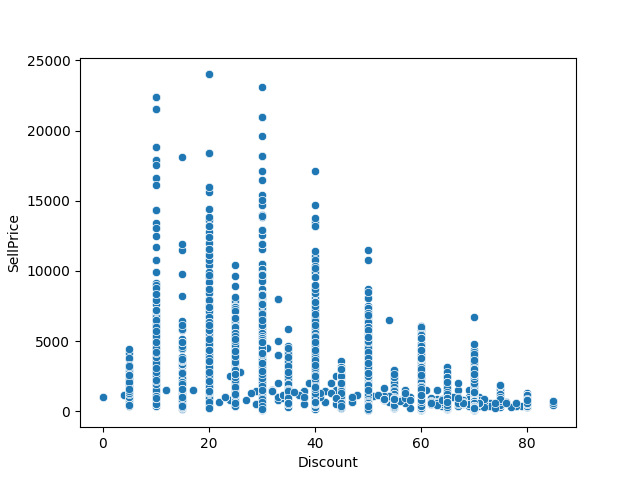

Correlation is -0.3275431127024022


/home/phil/projects/my_project_env/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


In [11]:
# Does Discount have a correlation with SellPrice?
import seaborn as sns
plt.figure()
sns.scatterplot(ecommerce.Discount, ecommerce.SellPrice)
correlation = ecommerce['Discount'].corr(ecommerce['SellPrice'])
print('Correlation is ' + str(correlation))
# Not too much of a correlation but you can see a general reduction in prices as the discount increases

<IPython.core.display.Javascript object>


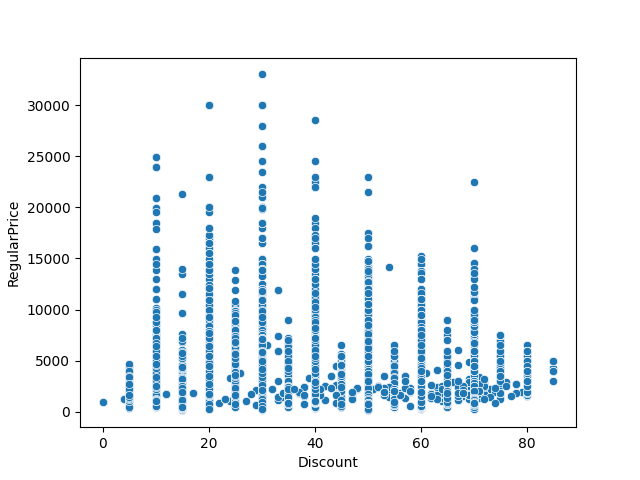

Correlation is -0.04856457487759719


/home/phil/projects/my_project_env/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


In [12]:
# Are discounted items typically more expensive? Since discounts seem to reflect lower prices in general
# can we say anything about how expensive these items were before
plt.figure()
sns.scatterplot(ecommerce.Discount, ecommerce.RegularPrice)
correlation2 = ecommerce['Discount'].corr(ecommerce['RegularPrice'])
print('Correlation is ' + str(correlation2))
# A smaller correlation with the same trend as before.

In [13]:
# Let's visualize the average price at ten percent discount increments
increments = pd.cut(ecommerce['Discount'], [-0.000001, 9, 19, 29, 39, 49, 59, 69, 79, 89, 99], labels = ['0-10%', '10-20%', '20-30%', '30-40%', '40-50%', '50-60%', '60-70%', '70-80%', '80-90%', '90-100%'])
avincrements = ecommerce['SellPrice'].groupby(increments).describe()
avincrements

,count,mean,std,min,25%,50%,75%,max
Discount,,,,,,,,
0-10%,258.0,1587.906977,620.221637,389.0,1140.0,1519.0,1899.0,4465.0
10-20%,594.0,3260.638047,3935.288022,169.0,1259.0,1890.0,3510.0,22410.0
20-30%,2151.0,2575.965597,2254.794003,236.0,1439.0,1999.0,2799.0,23996.0
30-40%,3118.0,1955.666774,2075.487272,119.0,909.0,1398.0,2099.0,23096.0
40-50%,2782.0,1605.467290,1399.339787,205.0,899.0,1259.0,1911.0,17097.0
50-60%,9082.0,1082.934045,815.855561,74.0,599.0,899.0,1349.0,11497.0
60-70%,3518.0,1091.980955,799.076328,114.0,599.0,879.0,1399.0,6116.0
70-80%,830.0,956.777108,729.043761,89.0,499.0,749.0,1199.0,6750.0
80-90%,80.0,755.562500,260.847686,319.0,599.0,779.0,999.0,1299.0


In [38]:
# No discounts at 90% off or above so I will delete it
avincrements.drop(index= '90-100%', inplace=True)
avincrements

,count,mean,std,min,25%,50%,75%,max
Discount,,,,,,,,
0-10%,258.0,1587.906977,620.221637,389.0,1140.0,1519.0,1899.0,4465.0
10-20%,594.0,3260.638047,3935.288022,169.0,1259.0,1890.0,3510.0,22410.0
20-30%,2151.0,2575.965597,2254.794003,236.0,1439.0,1999.0,2799.0,23996.0
30-40%,3118.0,1955.666774,2075.487272,119.0,909.0,1398.0,2099.0,23096.0
40-50%,2782.0,1605.467290,1399.339787,205.0,899.0,1259.0,1911.0,17097.0
50-60%,9082.0,1082.934045,815.855561,74.0,599.0,899.0,1349.0,11497.0
60-70%,3518.0,1091.980955,799.076328,114.0,599.0,879.0,1399.0,6116.0
70-80%,830.0,956.777108,729.043761,89.0,499.0,749.0,1199.0,6750.0
80-90%,80.0,755.562500,260.847686,319.0,599.0,779.0,999.0,1299.0


<IPython.core.display.Javascript object>


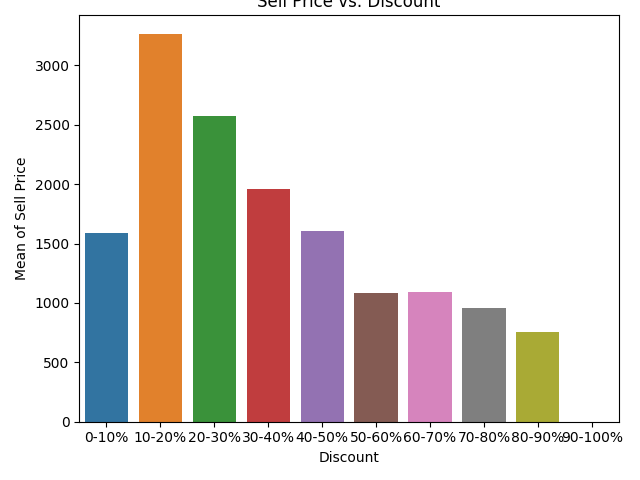

Text(0.5, 1.0, 'Sell Price vs. Discount')

In [15]:
# Now lets visualize it
avincrements.reset_index(inplace=True)
plt.figure()
sns.barplot(data = avincrements, x= 'Discount', y= 'mean')
plt.tight_layout()
plt.ylabel('Mean of Sell Price')
plt.title('Sell Price vs. Discount')
# We can see the trend much more clearly in this graph

<IPython.core.display.Javascript object>


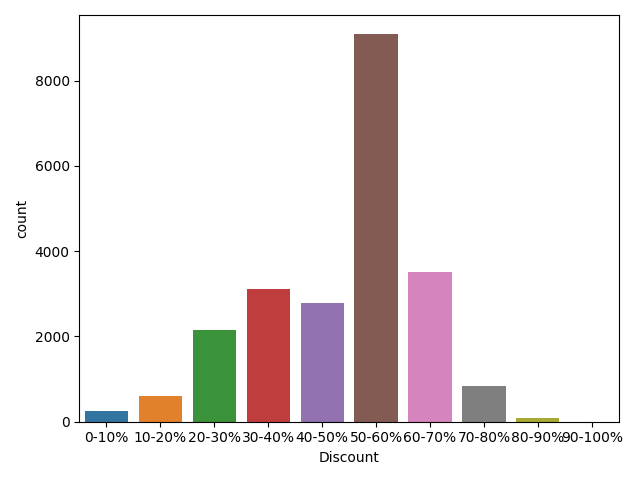

In [16]:
## Now let's look at what was the most common discount
plt.figure()
sns.barplot(data=avincrements, x='Discount', y='count')
plt.tight_layout()
# 50-60% is the most common discount range by far

In [17]:
print('There are ' + str(avincrements.loc[5, 'count']) + ' items with a 50-60% discount')

There are 9082.0 items with a 50-60% discount


In [18]:
# Now let's look at how brand impacts sell price
SellPriceVsBrand = ecommerce['SellPrice'].groupby(ecommerce['BrandName']).mean()
SellPriceVsBrand

BrandName
109f                    684.921053
4711                   3120.000000
aarke                  1140.000000
abercrombie & fitch    4110.000000
adidas                 1551.171053
                          ...     
w                      1747.390805
wacoal                  990.260000
yuris                  1159.134048
zink london            1049.261723
ziyaa                  1046.980769
Name: SellPrice, Length: 177, dtype: float64

<IPython.core.display.Javascript object>


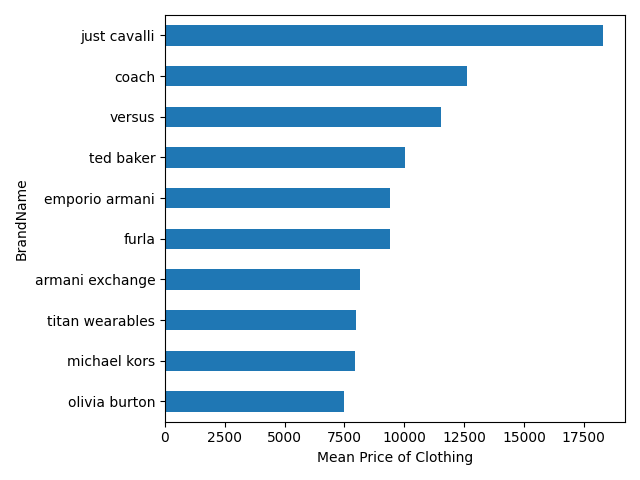

<IPython.core.display.Javascript object>


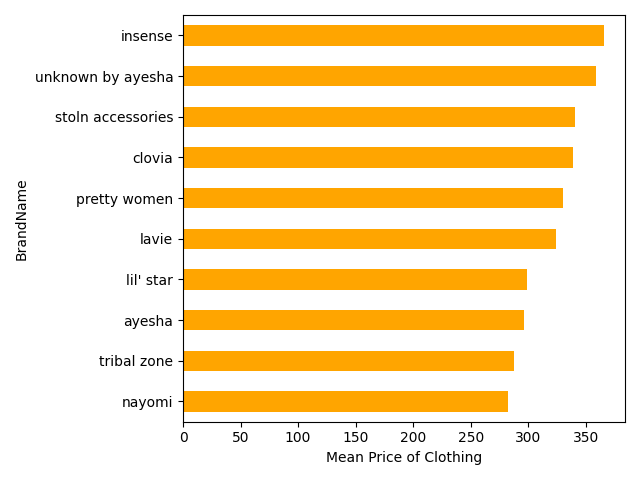

In [19]:
# Since there are so many brands let's look at only the top ten most expensive and inexpensive
ExpensiveBrands = SellPriceVsBrand.sort_values(ascending=False).head(10)
ExpensiveBrands.sort_values(ascending=True, inplace=True)
NonexpensiveBrands = SellPriceVsBrand.sort_values(ascending=True).head(10)
NonexpensiveBrands.sort_values(ascending=True, inplace=True)
plt.figure()
ExpensiveBrands.plot(kind='barh')
plt.xlabel('Mean Price of Clothing')
plt.tight_layout()
plt.figure()
NonexpensiveBrands.plot(kind='barh', color = 'orange')
plt.xlabel('Mean Price of Clothing')
plt.tight_layout()
# Just Cavalli has the most expensive clothing on average while Nayomi has the cheapest on average

In [20]:
# Which brand usually has the largest discounts?
DiscountVsBrand = ecommerce['Discount'].groupby(ecommerce['BrandName']).agg(['mean', 'count'])
DiscountVsBrand.sort_values(by='mean', ascending=False).head(10)
# gas is the brand with the highest average discounts. It only has one item though so let's look a brands with at
# least 50 items

,mean,count
BrandName,,
gas,75.000000,1
nayomi,73.000000,3
myshka,72.060519,347
varkala silk sarees,70.923077,65
unknown by ayesha,70.000000,1
jewelz,65.000000,185
iti,64.857143,7
109f,60.684211,76
varanga,60.138632,541


In [21]:
DiscountVsBrand = DiscountVsBrand[DiscountVsBrand['count']>=50]
DiscountVsBrand = DiscountVsBrand.sort_values(by='mean', ascending=False).head(10)
DiscountVsBrand

,mean,count
BrandName,,
myshka,72.060519,347
varkala silk sarees,70.923077,65
jewelz,65.000000,185
109f,60.684211,76
varanga,60.138632,541
fusion beats,59.340000,100
ziyaa,59.067308,520
yuris,59.021448,373
rare,57.240566,212


<IPython.core.display.Javascript object>


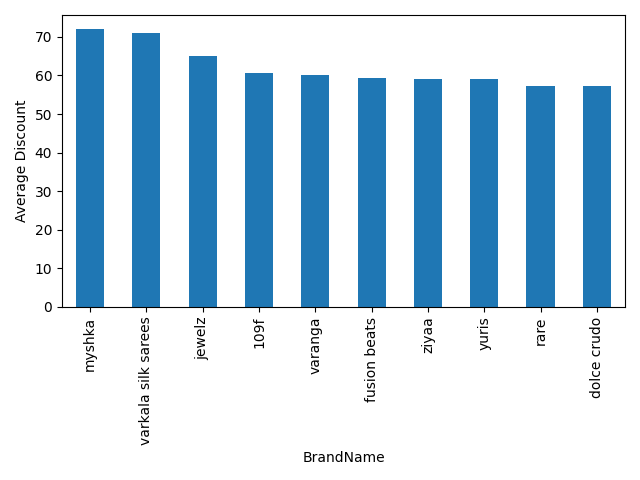

In [22]:
DiscountVsBrand.plot(kind='bar', y='mean', legend=False)
plt.ylabel('Average Discount')
plt.tight_layout()
# Myshka brand has the largest discounts on average

In [23]:
# Let's see how discounts relate to average price
DiscountAndSellPrice = ecommerce[['Discount', 'SellPrice']].groupby(ecommerce['BrandName']).agg({
    'Discount':['mean', 'count'],
    'SellPrice':'mean'
})
DiscountAndSellPrice.columns = ['Mean of Discount', 'Number of Items', 'Mean of SellPrice']
DiscountAndSellPrice

,Mean of Discount,Number of Items,Mean of SellPrice
BrandName,,,
109f,60.684211,76,684.921053
4711,20.000000,1,3120.000000
aarke,40.000000,1,1140.000000
abercrombie & fitch,20.000000,4,4110.000000
adidas,35.394737,152,1551.171053
...,...,...,...
w,39.272031,261,1747.390805
wacoal,35.000000,50,990.260000
yuris,59.021448,373,1159.134048


<IPython.core.display.Javascript object>


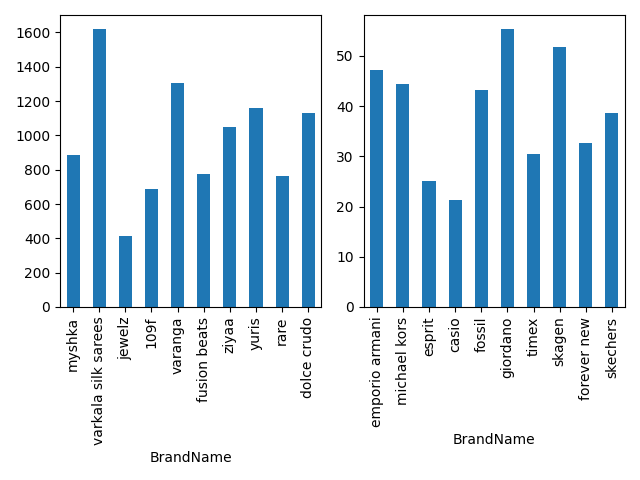

In [24]:
# Now let's filter out all of the brands that have less than 50 items
DiscountAndSellPrice = DiscountAndSellPrice[DiscountAndSellPrice['Number of Items']>=50]
Discounts = DiscountAndSellPrice.sort_values(by='Mean of Discount', ascending=False).head(10)
SellPrices = DiscountAndSellPrice.sort_values(by='Mean of SellPrice', ascending=False).head(10)

fig, axis = plt.subplots(1,2)
Discounts['Mean of SellPrice'].plot(kind='bar', ax=axis[0])
SellPrices['Mean of Discount'].plot(kind='bar', ax=axis[1])
plt.tight_layout()
# This is not very helpful let's rank the data in each plot according to where it is in the distribution of prices
# and discounts

In [32]:
# In order to do this I need to calculate the percentile with stats from scipy
from scipy import stats
res = Discounts['Mean of SellPrice'].tolist()
res2 = SellPrices['Mean of Discount'].tolist()
avlist = list()
avdis = list()
for x in res:
    avlist.append(stats.percentileofscore(ecommerce['SellPrice'].tolist(), x))
for y in res2:
    avdis.append(stats.percentileofscore(ecommerce['Discount'], y))
print(str(np.mean(avlist)) + " is the average percentile of sell prices in top discounted brands")
print('\n')
print(str(np.mean(avdis)) + " is the average percentile of discounts in top sold brands")
#There does not seem to be that high of prices with high discounted brands and the same goes vice versa
    

42.00464016419043 is the average percentile of sell prices in top discounted brands


37.09030473385981 is the average percentile of discounts in top sold brands


In [34]:
#Now let's look at the relationship between category and discounts
catdisprice = ecommerce[['Discount', 'SellPrice', 'Category']].groupby(ecommerce['Category']).mean()
catdisprice

,Discount,SellPrice
Category,,
Footwear-Women,39.420343,1669.393382
Fragrance-Women,21.336898,3009.160428
Indianwear-Women,50.773011,1342.437966
Jewellery-Women,39.850416,1396.000923
Lingerie&Nightwear-Women,41.884155,744.269507
Watches-Women,34.956923,6179.305641
Westernwear-Women,43.156787,1164.024558


<IPython.core.display.Javascript object>


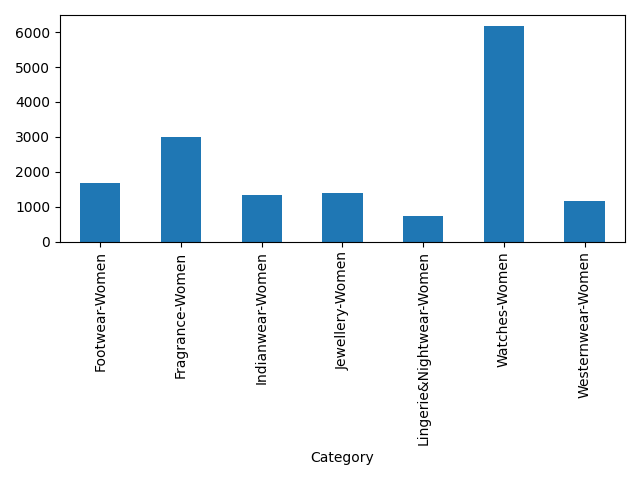

In [41]:
plt.figure()
catdisprice['SellPrice'].plot(kind='bar')
plt.tight_layout()
## Woman's watches are the most expensive

<IPython.core.display.Javascript object>


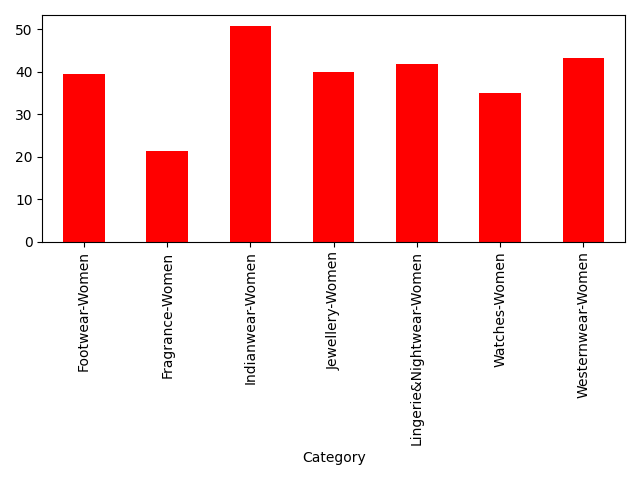

In [43]:
plt.figure()
catdisprice['Discount'].plot(kind='bar', color='red')
plt.tight_layout()
#indianwear is the most discounted

In [59]:
#Let's take a deeper look into what discounts are offered for each category
#ecommerce['Discount'].groupby([increments, ecommerce['Category']]).count()
DiscountsForCategories = pd.crosstab(increments, ecommerce['Category'])
DiscountsForCategories

Category,Footwear-Women,Fragrance-Women,Indianwear-Women,Jewellery-Women,Lingerie&Nightwear-Women,Watches-Women,Westernwear-Women
Discount,,,,,,,
0-10%,2,0,11,222,23,0,0
10-20%,31,60,9,84,129,99,182
20-30%,279,91,438,66,132,224,921
30-40%,360,28,657,77,364,219,1413
40-50%,211,0,954,20,291,165,1141
50-60%,720,8,3639,211,993,142,3369
60-70%,21,0,1883,318,135,79,1082
70-80%,8,0,524,85,19,47,147
80-90%,0,0,66,0,3,0,11


<IPython.core.display.Javascript object>


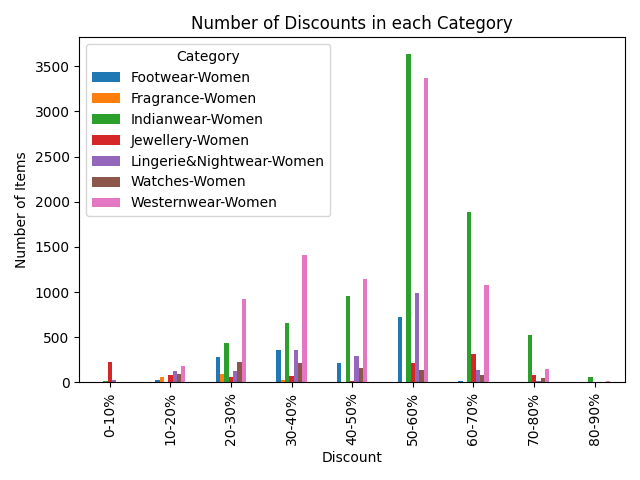

In [90]:
DiscountsForCategories.plot(kind='bar')
plt.ylabel('Number of Items')
plt.title('Number of Discounts in each Category')
plt.tight_layout()

<IPython.core.display.Javascript object>


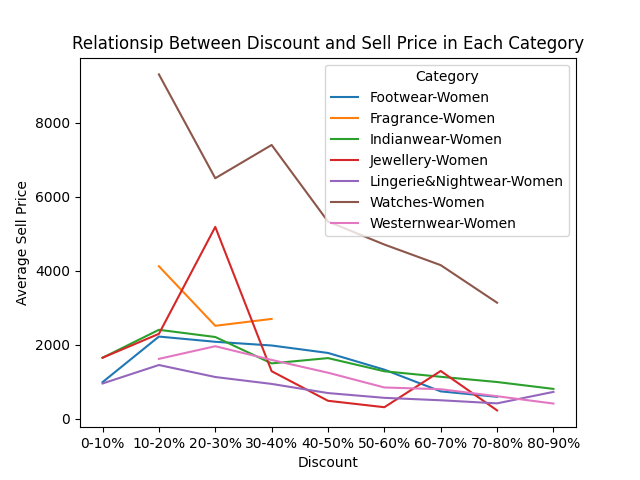

Text(0.5, 1.0, 'Relationsip Between Discount and Sell Price in Each Category')

In [99]:
# Now let's look at to see if as sell price increases does discounts change in each category
catselldis = ecommerce.pivot_table(index=increments, columns='Category', values='SellPrice')
catselldis.plot(kind='line')
plt.ylabel("Average Sell Price")
plt.title("Relationsip Between Discount and Sell Price in Each Category")
# Each category seems to follow a similar trend of having a smaller price on average with a higher discount

<IPython.core.display.Javascript object>


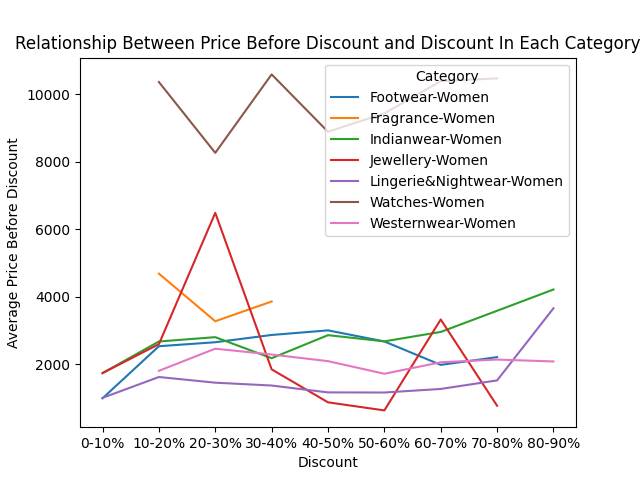

Text(0.5, 1.0, 'Relationship Between Price Before Discount and Discount In Each Category')

In [100]:
# Now let's look at this for the price before the discount
catregdis = ecommerce.pivot_table(index=increments, columns='Category', values='RegularPrice')
catregdis.plot(kind='line')
plt.ylabel('Average Price Before Discount')
plt.title('Relationship Between Price Before Discount and Discount In Each Category')
#Appears to be no significant relation in most categories